# Analysing Data for Grouped Mode ScF3

This tutorial will cover analysing data obtained from the GroupMode_ScF3 tutorial. Compared to the Single Mode tutorial, there are a couple additional plotting functions for the grouped mode version. The same script is used, in the same way:

In [1]:
import sys

sys.path.append('..')

import sapa_utils_hdf as su

scf3 = su.sapa_utils_hdf('ScF3_iso.cif', 'ScF3.hdf5')

The datasets for the grouped mode hdf5 files are at 'irrep/parameter', and as in the Single Mode tutorial we can see their shape reflects the number of data files and cycles:

In [2]:
print(scf3.hdf['GM4-/Rwp'])

<HDF5 dataset "Rwp": shape (13, 300), type "<f4">


The datasets here are also all ordered by Rwp:

In [3]:
print(scf3.hdf['GM4-/Rwp'][0,:])

[13.9757  13.97727 13.97759 13.97882 13.9792  13.97945 13.9796  13.98
 13.98059 13.98065 13.98125 13.98148 13.98267 13.98269 13.98285 13.98302
 13.98304 13.98344 13.98353 13.98427 13.98452 13.98533 13.98535 13.98536
 13.98538 13.98576 13.98589 13.9859  13.9859  13.9861  13.98653 13.98657
 13.98682 13.98711 13.98727 13.98743 13.98756 13.98757 13.98786 13.98794
 13.98817 13.98827 13.98841 13.98842 13.98842 13.98861 13.98877 13.98883
 13.98886 13.98889 13.98907 13.98925 13.98931 13.9894  13.98955 13.98968
 13.98975 13.98986 13.98994 13.99068 13.99081 13.99109 13.99109 13.99114
 13.99128 13.99136 13.99141 13.99146 13.99146 13.99149 13.99157 13.99164
 13.99185 13.99187 13.99228 13.99237 13.99238 13.99262 13.99269 13.9928
 13.99283 13.99306 13.99321 13.99325 13.99333 13.99349 13.99364 13.99367
 13.99369 13.99378 13.99392 13.99401 13.99406 13.99407 13.9942  13.99421
 13.99453 13.99458 13.99474 13.99483 13.99486 13.99489 13.99502 13.99521
 13.99523 13.99524 13.99527 13.99542 13.99548 13.99558 

If we look at the list of keys for an irrep:

In [4]:
print(list(scf3.hdf['GM4-'].keys()))

['F_beq', 'Rwp', 'Sc_beq', 'a1', 'a2', 'a25', 'a26', 'a27', 'a28', 'a29', 'a3', 'a30', 'delrwp', 'lprm_a', 'lprm_al', 'lprm_b', 'lprm_be', 'lprm_c', 'lprm_ga', 'mode_amps', 'norms', 'phase_scale', 'r2v', 'rv', 'ycalc', 'yobs']


we see a few that are not refined parameters within Topas. These are delrwp, mode_amps, norms, ycalc and yobs. The final two are self explanatory; these are the calculated and observed PDF over the relevant r range; these can be plotted with the 'plot_pdf' function:

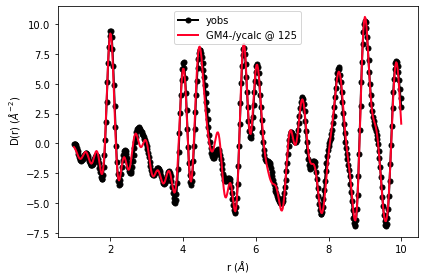

In [5]:
scf3.plot_pdf(temp_list=[125], filename='GM4-_125K_PDF_plot.png', keys=['GM4-/ycalc'], yobs = True)
#print(scf3.hdf['r_vals'])

The only optional argument here is yobs; set this to True if you would like to plot the observed PDF for the supplied temperatures in temp_list. It is recommended to only plot yobs if you are plotting calculated PDFs for a single temp.

If you are using multiple temperatures, you can provide an offset between successive PDFs; here we plot all observed PDFs:

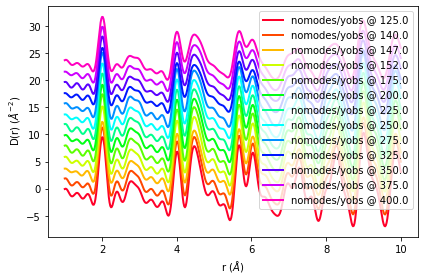

In [6]:
scf3.plot_pdf(scf3.temps, 'all_obs_pdf.png', ['nomodes/yobs'], offset = 2)

delrwp is the rwp with the Rwp of a refinement with no modes refined subtracted; the more negative this value is, the better it the refinement. mode_amps is the square root of the sum of squares of the normalised individual mode amplitudes; the values in the columns named 'aXX', where XX is mode number, are in fractional coordinates; they need to be normalised by the values in 'norms'. This is obtained from the ISODISTORT CIF. 

All the parameters, except the individual mode amplitudes, yobs and ycalc can be plotted using the 'plot_all' function. This saves figures for the best refinement at each temperature:

In [7]:
scf3.plot_all()

Using the plot function, you can supply specific keys to plot:

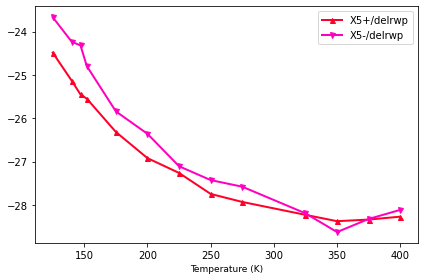

In [8]:
scf3.plot(['X5+/delrwp', 'X5-/delrwp'])

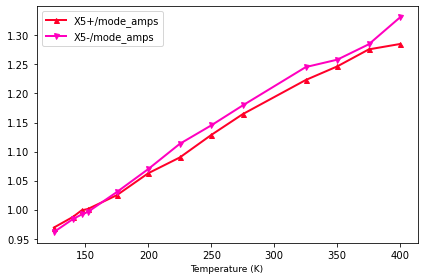

In [9]:
scf3.plot(['X5+/mode_amps', 'X5-/mode_amps'])

Since the irreps frequently have multiple modes associated with them, we can look at the correlation between these modes. A +1 correlation means that an increase in one mode will result in the increase of another, and the opposite is true for a -1 correlation. A value of 0 means the modes are not correlated. In the below function, a weighted variance is used to calculate the correlations; the refinements are weighted according to $exp{(\Delta Rw_0 - \Delta Rw_i)/ \sigma}$, where $\Delta Rw_i$ is the delrwp of the refinement and $\Delta Rw_0$ is the delrwp for the best refinement for that temperature and irrep. $\sigma$ can be thought of as a measure of a significant difference in fits; a smaller value of $\sigma$ will skew the weightings towards the better refinements more than a larger value of $\sigma$ will.

If we look at the delrwp for X5- at the lowest temp:

In [10]:
print(scf3.hdf['X5-/delrwp'][0,:])

[-23.66739 -23.66575 -23.66472 -23.66457 -23.66398 -23.66334 -23.66326
 -23.66319 -23.66317 -23.6631  -23.66302 -23.66302 -23.66283 -23.66255
 -23.66248 -23.66245 -23.66243 -23.66224 -23.66193 -23.66173 -23.6615
 -23.66127 -23.66115 -23.66084 -23.66072 -23.66056 -23.66052 -23.66029
 -23.66029 -23.6602  -23.66014 -23.65994 -23.65993 -23.65988 -23.65983
 -23.6597  -23.65958 -23.65956 -23.65951 -23.6595  -23.6595  -23.65946
 -23.65945 -23.65899 -23.65894 -23.65892 -23.65892 -23.65889 -23.6588
 -23.65871 -23.65864 -23.6586  -23.65853 -23.65847 -23.65844 -23.65844
 -23.65836 -23.65828 -23.65827 -23.65818 -23.65818 -23.65813 -23.6581
 -23.65807 -23.65807 -23.65795 -23.65792 -23.65791 -23.65789 -23.65784
 -23.65779 -23.65779 -23.65777 -23.65777 -23.65775 -23.65775 -23.65773
 -23.65773 -23.65767 -23.65766 -23.65763 -23.65757 -23.65755 -23.65754
 -23.65753 -23.65752 -23.6575  -23.65749 -23.65747 -23.65744 -23.65742
 -23.6574  -23.65737 -23.65736 -23.65736 -23.65733 -23.65733 -23.65729
 -23.6572

A value of $\sigma = 1$ would include all but the very worst refinements in the first $\sigma$; a value of 0.1 would probably suffice. If you change the 0 in the index above to a -1 and re-run that box, we see that at the final temperature, a value of 0.1 still covers the majority of the refinements. To look at the correlation plots, we use the below function:

In [11]:
scf3.plot_correlation_matrix('X5-', temp=400, sigma=0.1)
scf3.plot_correlation_matrix('X5-', temp=400, sigma=0.1, abs = True)

This saves the generated plots to file. The optional abs argument allows you to calculate the correlation on the absolute values of the modes, since they can be both positive and negative; any correlations are easier to see with this.

In the generated plots, the diagonal components will always have a correlation of +1, since everything is perfectly correlated to itself.

The last function I will demonstrate is the generate_cif function. This generates a CIF for the lowest Rwp refinement for a given irrep and temperature. Note that this uses the input CIF for lattice parameters, elements etc, so if you are using one CIF for multiple iso-structural SAPA runs then this will have to be edited (either edit the CIF post generation, or make a new isodistort CIF).

In [12]:
scf3.generate_cif('X5+', 125)